# Resource constrained project scheduling by Himanshu Bhardwaj

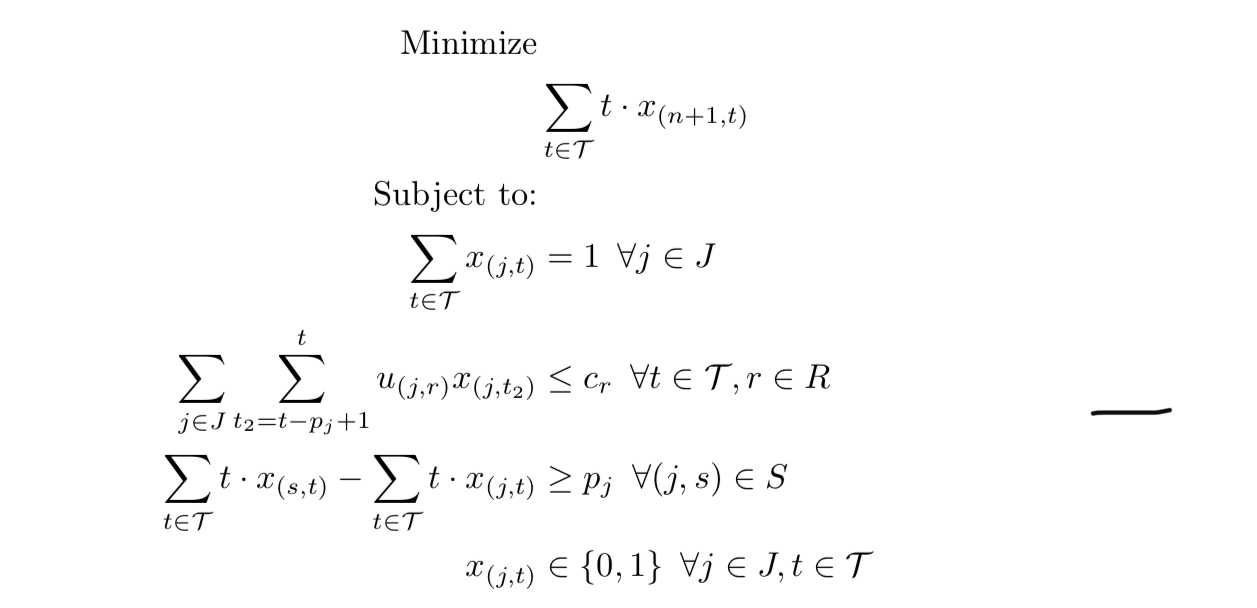

Here J is the job set, T is set of possible time of the job, S is the set of precedence between the job (i,j) ϵ J XJ. R is the set of resources and $c_r$ is the capacity of the resources. $u_{(j,r)}$ is the amount of resources r required to process job j. 

In [5]:
from itertools import product
from graphviz import Digraph
from mip import Model, xsum, BINARY
import numpy as np
import pandas as pd

In [6]:
gg = Digraph('finite_state_machine', filename='fsm.gv')
gg.attr(rankdir='LR', size='10,10')
gg.attr('node', shape='doublecircle')

In [7]:
rawd = pd.read_csv('Q2.csv')
rawd

,P,T,time,Cj1,Cj2
0,0,1,8,12,8
1,1,2,2,5,7
2,1,3,3,2,5
3,1,4,60,12,10
4,2,5,40,10,8
5,3,6,2,2,5
6,4,7,2,3,2
7,"5,6",8,20,4,3
8,7,9,10,5,3
9,"8,9",10,10,5,5


In [8]:
import PERT as pt

In [9]:
rawd1 = pd.read_csv('Q1.csv')

In [10]:
rawd1

,pred,target,time,Cj1,Cj2
0,Start,A,8,12,8
1,A,B,2,5,7
2,A,C,3,2,5
3,A,D,60,12,10
4,B,E,40,10,8
5,C,F,2,2,5
6,D,G,2,3,2
7,"E,F",H,20,4,3
8,G,I,10,5,3
9,"H,I",J,10,5,5


In [11]:
G = pt.disp_graph(rawd1, "days")

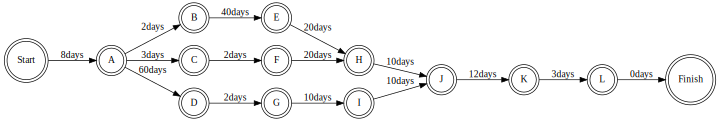

In [12]:
G

In [13]:
p = []
u = []
S = []
p.append(0)
u.append([0,0])
for index, row in rawd.iterrows():
    p.append(row[2])
    u.append([row[3],row[4]])
    for rr in row[0].split(","):
        S.append([int(rr), row[1]])
    

In [14]:
p

[0, 8, 2, 3, 60, 40, 2, 2, 20, 10, 10, 12, 3, 0]

In [15]:
u

[[0, 0],
 [12, 8],
 [5, 7],
 [2, 5],
 [12, 10],
 [10, 8],
 [2, 5],
 [3, 2],
 [4, 3],
 [5, 3],
 [5, 5],
 [3, 3],
 [2, 4],
 [0, 0]]

In [16]:
S

[[0, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [2, 5],
 [3, 6],
 [4, 7],
 [5, 8],
 [6, 8],
 [7, 9],
 [8, 10],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13]]

In [17]:
len(S)

15

In [18]:
len(p)

14

In [19]:
len(u)

14

In [20]:
c = [20,15]

In [21]:
(R,J,T) = (range(len(c)),range(len(p)),range(sum(p)))

In [22]:
from itertools import product
from mip import Model,xsum,BINARY

In [23]:
model = Model()

In [24]:
x = [[model.add_var(name="x({},{})".format(j,t), var_type=BINARY) for t in T] for j in J]

In [25]:
n = 12

In [26]:
model.objective = xsum(t*x[n+1][t] for t in T)

In [27]:
for j in J:
    model+= xsum(x[j][t] for t in T)==1

In [28]:
for (r,t) in product(R,T):
    model+=(xsum(u[j][r]*x[j][t2] for j in J for t2 in range(max(0,t-p[j]+1), t+1))<=c[r])

In [29]:
for (j,s) in S:
    model+=xsum(t*x[s][t]-t*x[j][t] for t in T)>=p[j]

In [30]:
model.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [31]:
print("Schedule:")
for (j,t) in product(J,T):
    if x[j][t].x >= 0.99:
        print("job {}: begins at t={} and finishes at t={}". format(j,t,t+p[j]))
print("Makespan = {}".format(model.objective_value))

Schedule:
job 0: begins at t=0 and finishes at t=0
job 1: begins at t=0 and finishes at t=8
job 2: begins at t=8 and finishes at t=10
job 3: begins at t=23 and finishes at t=26
job 4: begins at t=50 and finishes at t=110
job 5: begins at t=10 and finishes at t=50
job 6: begins at t=41 and finishes at t=43
job 7: begins at t=110 and finishes at t=112
job 8: begins at t=51 and finishes at t=71
job 9: begins at t=112 and finishes at t=122
job 10: begins at t=122 and finishes at t=132
job 11: begins at t=132 and finishes at t=144
job 12: begins at t=144 and finishes at t=147
job 13: begins at t=147 and finishes at t=147
Makespan = 147.0
